<a href="https://colab.research.google.com/github/riccardosl/study-anomaly-detection/blob/develop/ICA2_DNN_NSLKDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io

from tensorflow.keras.utils import get_file

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 5)

try:
    path = get_file('NSL_KDD_Train.csv', origin=\
    'https://raw.githubusercontent.com/riccardosl/study-anomaly-detection/develop/Datasets/NSL_KDD_Train.csv')
except:
    print('Error downloading')
    raise
   
print(path)

14368768/14361833 [==============================] - 0s 0us/step
/root/.keras/datasets/NSL_KDD_Train.csv


In [2]:


col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","outcome"]

df = pd.read_csv(path, header=None, names = col_names)    


In [3]:

print("Read {} rows.".format(len(df)))

#display first rows

#pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', 5)
df.head(5)

Read 125973 rows.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables (example [1,0,0]] 

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [5]:
# Now encode the feature vector using the functions defined above

pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 5)

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

# display 5 rows
df.dropna(inplace=True,axis=1)
df[0:5]


,duration,src_bytes,dst_bytes,...,is_host_login-1,is_guest_login-0,is_guest_login-1
0,-0.110249,-0.007679,-0.004919,...,0,1,0
1,-0.110249,-0.007737,-0.004919,...,0,1,0
2,-0.110249,-0.007762,-0.004919,...,0,1,0
3,-0.110249,-0.007723,-0.002891,...,0,1,0
4,-0.110249,-0.007728,-0.004814,...,0,1,0


In [6]:
normal_mask = df['outcome']=='normal'
attack_mask = df['outcome']!='normal'

df.drop('outcome',axis=1,inplace=True)

df_normal = df[normal_mask]
df_attack = df[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 67343
Attack count: 58630


In [7]:
# This is the numeric feature vector, as it goes to the neural net
x_normal = df_normal.values
x_attack = df_attack.values

In [8]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    x_normal, test_size=0.25, random_state=42)

In [9]:
print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")

Normal train count: 50507
Normal test count: 16836


In [10]:
from sklearn import metrics
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to
model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=100)

Epoch 1/100
1579/1579 [==============================] - 4s 2ms/step - loss: 0.1507
Epoch 2/100
1579/1579 [==============================] - 3s 2ms/step - loss: 0.0914
Epoch 3/100
1579/1579 [==============================] - 3s 2ms/step - loss: 0.0757
Epoch 4/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0705
Epoch 5/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0680
Epoch 6/100
1579/1579 [==============================] - 3s 2ms/step - loss: 0.0633
Epoch 7/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0718
Epoch 8/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0527
Epoch 9/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0475
Epoch 10/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0469
Epoch 11/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0541
Epoch 12/100
1579/1579 [==============================] - 2s 2ms/step - lo

In [11]:
#

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                3150      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 25)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 125)               3250      
Total params: 6,578
Trainable params: 6,578
Non-trainable params: 0
_________________________________________________________________


In [12]:
pred = model.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = model.predict(x_normal)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal))
pred = model.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))
print(f"Out of Sample Normal Score (RMSE): {score1}") # from test , percentage shows a low liklehood of an attack
print(f"Insample Normal Score (RMSE): {score2}") #in the training data, more confident that was not an attack
print(f"Attack Underway Score (RMSE): {score3}") # percent %


Out of Sample Normal Score (RMSE): 0.3985867153183623
Insample Normal Score (RMSE): 0.23540966493680612
Attack Underway Score (RMSE): 0.5479347411873188


In [13]:
# The aim of this is to save the model in a history variable for graph represenation
#import keras
#from matplotlib import pyplot as plt
#history = model.fit(x_normal_train,x_normal_train,verbose=1,epochs=100)


Epoch 1/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0237
Epoch 2/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0226
Epoch 3/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0237
Epoch 4/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0224
Epoch 5/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0226
Epoch 6/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0225
Epoch 7/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0217
Epoch 8/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0218
Epoch 9/100
1579/1579 [==============================] - 2s 2ms/step - loss: 0.0228
Epoch 10/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0214
Epoch 11/100
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0221
Epoch 12/100
1579/1579 [==============================] - 2s 2ms/step - lo

In [15]:
!pip install livelossplot

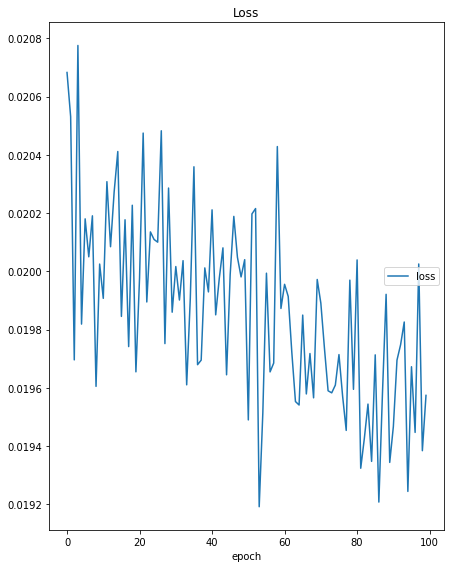

Loss
	loss             	 (min:    0.019, max:    0.021, cur:    0.020)


In [16]:
# The graph represents the loss during the training
from livelossplot import PlotLossesKeras
model.fit(x_normal_train,x_normal_train, callbacks=[PlotLossesKeras()], verbose=1,epochs=100)